In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path as path
import numpy as np

In [91]:
import numpy as np
import script.model.bonds as bd
import script.model.model as sim
import script.model.utility as utl
import copy
import scipy.special as spe
from importlib import reload
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import quad
import json


# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

def getFig(figsize=(4, 3), xlab="", ylab=""):
    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    if xlab:
        ax.set_xlabel(xlab)
    if ylab:
        ax.set_ylabel(ylab)
    return ax
tB = 1e-10

In [98]:
np.random.binomial(3, 0.1)

1

In [185]:
kT = 4.14
tunit = 1.0/60
import math

def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

def lifetimePDF(t, ea, eb, f, n, xa=1.5, xb=2.0):
    k0 = 1/tunit
    lmd = k0*np.exp(-ea + f*xa / kT) + k0 * np.exp(-eb + f*xb / kT)
    ret = n * lmd * np.exp(-lmd * t) * (1-np.exp(-lmd * t))**(n-1)
    return ret

def nagPDF(nag, ea, eb, f, n, xa=1.5, xb=2.0):
    k0 = 1 / tunit
    ka = k0*np.exp(-ea + f*xa / kT)
    kb = k0 * np.exp(-eb + f*xb / kT)
    eta = ka / (ka + kb)
    return binom(n, nag) * eta**nag * ((1-eta)**(n-nag))


In [129]:
reload(sim)

prm_dict = sim.prm_dict.copy()
prm_dict["scheme"] = "step"
prm_dict["tc"] = -1
prm_dict["l0_list"] = [100, 0]
prm_dict["f0"] = 16
prm_dict["elist"] = [8, 10, 0, 0]
prm_dict["ton"] = 1e20   #0.3*np.exp(2)#1e20 #1e8-> kon=0.01
prm_dict["tm"] = 1e7

In [130]:
sto_low_f16 = sim.Stoch(prm_dict)
sto_low_f16.loadSharing=False
sto_low_f16.setup()
# sto_low_f0.get_info()

In [131]:
sto_low_f16.run(n=5000, output=True)

count= 5000................................................99%
nbar=51.68440, nstd=4.96500, t=24.05, f=16.000


(51.6844, 4.964997144007235, 24.049411271385743)

In [132]:
# prm_dict["f0"] = 0
prm_dict["elist"] = [8, 10.5, 0, 0]
sto_high_f16 = sim.Stoch(prm_dict)
sto_high_f16.setup()
sto_high_f16.loadSharing=False
pass

In [133]:
sto_high_f16.run(n=5000)

count= 5000................................................99%
nbar=63.85380, nstd=4.78573, t=29.82, f=16.000


(63.8538, 4.78573145506515, 29.815334444576933)

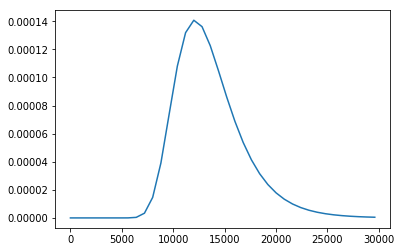

In [116]:
plt.plot(bins1, [lifetimePDF(ti, 8, 10, 0, 100) for ti in bins1], '-C0')



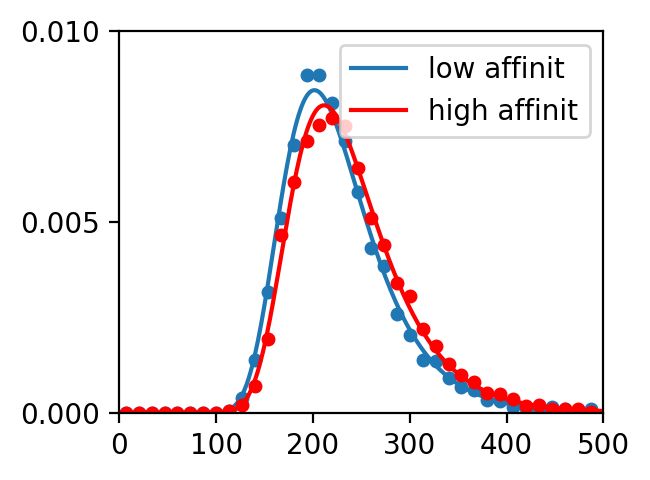

In [193]:
# low affinity F=0
bins1 = np.arange(0, 30000, 800)
hist1 = np.histogram(sto_low_f0.tlist, bins=bins1)
scale = 1# 000
fig, ax = plt.subplots(figsize=(3.35, 2.5), dpi=200)
plt.plot(tunit*(bins1[:-1] + bins1[1:]) / 2, scale * hist1[0]/(5000 * tunit*(bins1[1] - bins1[0])), 'o', ms=4)
tx = np.arange(0, 30000, 100)
plt.plot(tunit*tx, [scale * lifetimePDF(tunit*ti, 8, 10, 0, 100) for ti in tx], '-C0', label='low affinit')


hist2 = np.histogram(sto_high_f0.tlist, bins=bins1)
plt.plot(tunit*(bins1[:-1] + bins1[1:]) / 2, scale * hist2[0]/(5000 * tunit*(bins1[1] - bins1[0])), 'or', ms=4)
plt.plot(tunit*tx, [scale * lifetimePDF(tunit*ti, 8, 10.5, 0, 100) for ti in tx], '-r', label='high affinit')

ax.set(yticks=[0, 0.005, 0.01], xlim=(0, 500), ylim=(0, 0.01))
plt.legend(loc=0, fontsize=10)
plt.tight_layout()
plt.savefig("figs/fig1_C_new_min.pdf", format='pdf')
plt.show()

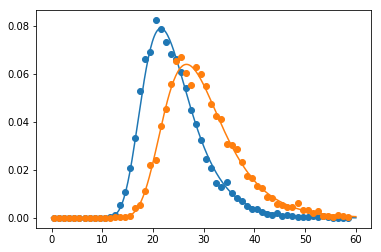

In [143]:
bins1 = np.arange(0, 60, 1)
hist1 = np.histogram(sto_low_f16.tlist, bins=bins1)
plt.plot((bins1[:-1] + bins1[1:]) / 2, hist1[0]/(5000 * (bins1[1] - bins1[0])), 'o')
tx = np.linspace(0, 60, 300)
plt.plot(tx, [lifetimePDF(ti, 8, 10, 16, 100) for ti in tx], '-C0', label='low affinit')


hist2 = np.histogram(sto_high_f16.tlist, bins=bins1)
plt.plot((bins1[:-1] + bins1[1:]) / 2, hist2[0]/(5000 * (bins1[1] - bins1[0])), 'oC1')
plt.plot(tx, [lifetimePDF(ti, 8, 10.5, 16, 100) for ti in tx], '-C1', label='high affinit')


plt.show()

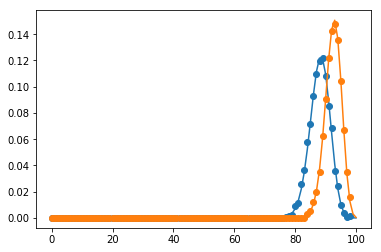

In [150]:
bins1 = np.arange(0, 100, 1)
hist1 = np.histogram(sto_low_f0.nags_list[0], bins=bins1)
plt.plot(bins1[:-1], hist1[0]/5000, 'oC0')
nx = np.linspace(0, 100, 101)
plt.plot(nx, [nagPDF(ni, 8, 10, 0, 100) for ni in nx], '-C0')

hist2 = np.histogram(sto_high_f0.nags_list[0], bins=bins1)
plt.plot(bins1[:-1], hist2[0]/5000, 'oC1')
plt.plot(nx, [nagPDF(ni, 8, 10.5, 0, 100) for ni in nx], '-C1')

plt.show()

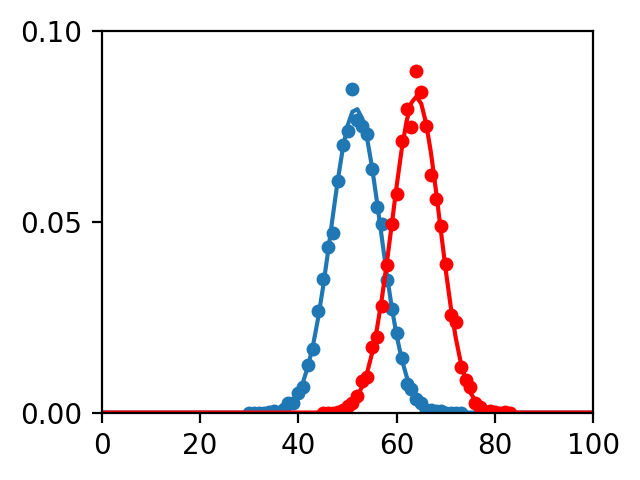

In [180]:
fig, ax = plt.subplots(figsize=(3.3, 2.5), dpi=200)
bins1 = np.arange(30, 75, 1)
hist1 = np.histogram(sto_low_f16.nags_list[0], bins=bins1)
plt.plot(bins1[:-1], hist1[0]/5000, 'oC0', ms=4)

nx = np.linspace(0, 100, 101)
plt.plot(nx, [nagPDF(ni, 8, 10, 16, 100) for ni in nx], '-C0')

bins1 = np.arange(45, 85, 1)
hist2 = np.histogram(sto_high_f16.nags_list[0], bins=bins1)
plt.plot(bins1[:-1], hist2[0]/5000, 'or', ms=4)
plt.plot(nx, [nagPDF(ni, 8, 10.5, 16, 100) for ni in nx], '-r')
ax.set(yticks=[0, 0.05, 0.1], ylim=(0, 0.1), xlim=(0, 100))
plt.tight_layout()
plt.savefig("figs/fig1_D_new.pdf", format='pdf')
plt.show()